In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('ravdess_ale.csv', skipinitialspace=True)

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   sex                  2452 non-null   object 
 6   frame_width          2452 non-null   int64  
 7   length_ms            2452 non-null   int64  
 8   zero_crossings_sum   2452 non-null   int64  
 9   mfcc_mean            2452 non-null   float64
 10  mfcc_std             2452 non-null   float64
 11  mfcc_min             2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   float64
 14  sc_std               2452 non-null   float64
 15  sc_min               2452 non-null   f

(2452, 30)

In [ ]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [ ]:
#df["frame_widthBin"] = pd.qcut(df["frame_width"], 4)
#df["length_msBin"] = pd.qcut(df["length_ms"], 4)
#df["zero_crossings_sumBin"] = pd.qcut(df["zero_crossings_sum"], 4)
#df["mfcc_meanBin"] = pd.qcut(df["mfcc_mean"], 4)
df["mfcc_stdBin"] = pd.qcut(df["mfcc_std"], 4)
df["mfcc_minBin"] = pd.qcut(df["mfcc_min"], 4)
df["mfcc_maxBin"] = pd.qcut(df["mfcc_max"], 4)
df["sc_meanBin"] = pd.qcut(df["sc_mean"], 4)
#df["sc_minBin"] = pd.qcut(df["sc_min"], 4)
df["sc_maxBin"] = pd.qcut(df["sc_max"], 4)
df["sc_stdBin"] = pd.qcut(df["sc_std"], 4)
df["sc_skewBin"] = pd.qcut(df["sc_skew"], 4)
df["sc_kurBin"] = pd.qcut(df["sc_kur"], 4)
df["stft_meanBin"] = pd.qcut(df["stft_mean"], 4)
df["stft_stdBin"] = pd.qcut(df["stft_std"], 4)
#df["stft_minBin"] = pd.qcut(df["stft_min"], 4)
df["stft_kurBin"] = pd.qcut(df["stft_kur"], 4)
df["stft_skewBin"] = pd.qcut(df["stft_skew"], 4)
df["meanBin"] = pd.qcut(df["mean"], 4)
df["stdBin"] = pd.qcut(df["std"], 4)
df["minBin"] = pd.qcut(df["min"], 4)
df["maxBin"] = pd.qcut(df["max"], 4)
df["kurBin"] = pd.qcut(df["kur"], 4)
df["skewBin"] = pd.qcut(df["skew"], 4)



In [ ]:
#tolgo le feature che nel codice precedente viene commentato(es. lenght ms tranne frame width che ha valori costanti)
df.drop(["frame_width","sc_skew","mean","stft_std", "std","min","max","kur","skew","stft_std","stft_skew","stft_mean","stft_kur","sc_min","sc_max","sc_std","sc_kur","sc_skew","mfcc_max","mfcc_std","mfcc_min" ], axis=1, inplace=True)

In [ ]:
df.columns, df.shape

(Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
        'repetition', 'sex', 'length_ms', 'zero_crossings_sum', 'mfcc_mean',
        'sc_mean', 'stft_min', 'mfcc_stdBin', 'mfcc_minBin', 'mfcc_maxBin',
        'sc_meanBin', 'sc_maxBin', 'sc_stdBin', 'sc_skewBin', 'sc_kurBin',
        'stft_meanBin', 'stft_stdBin', 'stft_kurBin', 'stft_skewBin', 'meanBin',
        'stdBin', 'minBin', 'maxBin', 'kurBin', 'skewBin'],
       dtype='object'), (2452, 29))

In [ ]:
#df["frame_widthBin"] = df["frame_widthBin"].astype(str) + '_width'
#df["length_msBin"] = df["length_msBin"].astype(str) + '_lenght'
#df["zero_crossin_sumBin"] =df["zero_crossings_sumBin"].astype(str) + '_crossingsum'
#df["mfcc_meanBin"] = df["mfcc_meanBin"].astype(str) + '_mfccmean'
df["mfcc_stdBin"] = df["mfcc_stdBin"].astype(str) + '_mfccstd'
df["mfcc_minBin"] = df["mfcc_minBin"].astype(str) + '_mfccmin'
df["mfcc_maxBin"] = df["mfcc_maxBin"].astype(str) + '_mfccmax'
df["sc_meanBin"] = df["sc_meanBin"].astype(str) + '_mfccmean'
#df["sc_minBin"] = df["sc_minBin"].astype(str) + '_scmin'
df["sc_maxBin"] = df["sc_maxBin"].astype(str) + '_scmax'
df["sc_stdBin"] = df["sc_stdBin"].astype(str) + '_scstd'
df["sc_kurBin"] = df["sc_kurBin"].astype(str) + '_sckur'
df["stft_meanBin"] = df["stft_meanBin"].astype(str) + '_stftmean'
#df["stft_minBin"] = df["stft_minBin"].astype(str) + '_stftmin'
df["stft_kurBin"] = df["stft_kurBin"].astype(str) + '_stftkur'
df["stft_skewBin"] = df["stft_skewBin"].astype(str) + '_stftskew'
df["stft_stdBin"] = df["stft_stdBin"].astype(str) + '_stftstd'
df["meanBin"] =df["meanBin"].astype(str) + '_mean'
df["stdBin"] = df["stdBin"].astype(str) + '_std'
df["minBin"] = df["minBin"].astype(str) + '_min'
df["maxBin"] = df["maxBin"].astype(str) + '_max'
df["kurBin"] = df["kurBin"].astype(str) + '_kur'
df["skewBin"] = df["skewBin"].astype(str) + '_skew'

In [ ]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,zero_crossings_sum,mfcc_mean,sc_mean,...,stft_meanBin,stft_stdBin,stft_kurBin,stft_skewBin,meanBin,stdBin,minBin,maxBin,kurBin,skewBin
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,16995,-33.485947,5792.550744,...,"(0.213, 0.415]_stftmean","(0.334, 0.349]_stftstd","(-1.292, -1.153]_stftkur","(0.336, 1.466]_stftskew","(-9.81e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(-0.202, -0.104]_min","(0.11, 0.224]_max","(6.52, 9.829]_kur","(0.263, 1.8]_skew"
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,13906,-29.502108,5197.620555,...,"(0.415, 0.476]_stftmean","(0.349, 0.392]_stftstd","(-1.391, -1.292]_stftkur","(0.126, 0.336]_stftskew","(-9.81e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(-1.0, -0.202]_min","(0.224, 0.999]_max","(14.085, 59.086]_kur","(0.263, 1.8]_skew"
2,song,happy,strong,Dogs are sitting by the door,2nd,F,4671,18723,-30.532463,4830.743037,...,"(0.213, 0.415]_stftmean","(0.349, 0.392]_stftstd","(-1.292, -1.153]_stftkur","(0.336, 1.466]_stftskew","(8.36e-07, 0.00122]_mean","(0.0139, 0.0262]_std","(-0.202, -0.104]_min","(0.11, 0.224]_max","(1.7570000000000001, 6.52]_kur","(0.263, 1.8]_skew"
3,speech,surprised,normal,Kids are talking by the door,1st,F,3637,11617,-36.059555,5376.446478,...,"(0.213, 0.415]_stftmean","(0.349, 0.392]_stftstd","(-1.6709999999999998, -1.391]_stftkur","(0.126, 0.336]_stftskew","(-9.81e-08, 8.36e-07]_mean","(-0.000348, 0.00679]_std","(-0.0544, -0.00613]_min","(0.0036699999999999997, 0.0555]_max","(9.829, 14.085]_kur","(-0.337, 0.00426]_skew"
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,15137,-31.405996,5146.012474,...,"(0.415, 0.476]_stftmean","(0.349, 0.392]_stftstd","(-1.391, -1.292]_stftkur","(0.126, 0.336]_stftskew","(8.36e-07, 0.00122]_mean","(0.0262, 0.152]_std","(-0.202, -0.104]_min","(0.224, 0.999]_max","(6.52, 9.829]_kur","(0.263, 1.8]_skew"


In [ ]:

#stat_dict = {0:"Dogs are sitting by the door",1:"Kids are talking by the door"}
#df["statement"] = df["statement"].map(stat_dict)

#rep_dict = {0: "1st", 1: "2nd"}
#df["repetition"] = df["repetition"].map(rep_dict)


#voc_channel_dict = {0: "song", 1: "speech"}
#df["vocal_channel"] = df["vocal_channel"].map(voc_channel_dict)

#sex_dict = {0: "M", 1: "F"}
#df["sex"] = df["sex"].map(sex_dict)

#emotionalintensity_dict = {0: "normal", 1: "strong"}
#df["emotional_intensity"] = df["emotional_intensity"].map(emotionalintensity_dict)

#emotion_dict = {0: "angry", 1: "calm", 2: "disgust", 3: "fearful", 4: "happy", 5: "nautral", 6: "sad", 7:"surprised"}
#df["emotion"] = df["emotion"].map(emotion_dict)


In [ ]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,zero_crossings_sum,mfcc_mean,sc_mean,...,stft_meanBin,stft_stdBin,stft_kurBin,stft_skewBin,meanBin,stdBin,minBin,maxBin,kurBin,skewBin
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,16995,-33.485947,5792.550744,...,"(0.213, 0.415]_stftmean","(0.334, 0.349]_stftstd","(-1.292, -1.153]_stftkur","(0.336, 1.466]_stftskew","(-9.81e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(-0.202, -0.104]_min","(0.11, 0.224]_max","(6.52, 9.829]_kur","(0.263, 1.8]_skew"
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,13906,-29.502108,5197.620555,...,"(0.415, 0.476]_stftmean","(0.349, 0.392]_stftstd","(-1.391, -1.292]_stftkur","(0.126, 0.336]_stftskew","(-9.81e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(-1.0, -0.202]_min","(0.224, 0.999]_max","(14.085, 59.086]_kur","(0.263, 1.8]_skew"
2,song,happy,strong,Dogs are sitting by the door,2nd,F,4671,18723,-30.532463,4830.743037,...,"(0.213, 0.415]_stftmean","(0.349, 0.392]_stftstd","(-1.292, -1.153]_stftkur","(0.336, 1.466]_stftskew","(8.36e-07, 0.00122]_mean","(0.0139, 0.0262]_std","(-0.202, -0.104]_min","(0.11, 0.224]_max","(1.7570000000000001, 6.52]_kur","(0.263, 1.8]_skew"
3,speech,surprised,normal,Kids are talking by the door,1st,F,3637,11617,-36.059555,5376.446478,...,"(0.213, 0.415]_stftmean","(0.349, 0.392]_stftstd","(-1.6709999999999998, -1.391]_stftkur","(0.126, 0.336]_stftskew","(-9.81e-08, 8.36e-07]_mean","(-0.000348, 0.00679]_std","(-0.0544, -0.00613]_min","(0.0036699999999999997, 0.0555]_max","(9.829, 14.085]_kur","(-0.337, 0.00426]_skew"
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,15137,-31.405996,5146.012474,...,"(0.415, 0.476]_stftmean","(0.349, 0.392]_stftstd","(-1.391, -1.292]_stftkur","(0.126, 0.336]_stftskew","(8.36e-07, 0.00122]_mean","(0.0262, 0.152]_std","(-0.202, -0.104]_min","(0.224, 0.999]_max","(6.52, 9.829]_kur","(0.263, 1.8]_skew"


In [ ]:
X = df.values.tolist()

In [ ]:
X[0]

['speech',
 'fearful',
 'normal',
 'Dogs are sitting by the door',
 '2nd',
 'F',
 3737,
 16995,
 -33.485947,
 5792.550744274666,
 0.0,
 '(122.624, 136.524]_mfccstd',
 '(-760.983, -692.89]_mfccmin',
 '(126.25, 180.081]_mfccmax',
 '(5775.96, 7655.336]_mfccmean',
 '(12091.886, 17477.54]_scmax',
 '(3025.432, 3433.835]_scstd',
 Interval(0.0985, 0.348, closed='right'),
 '(-1.309, -0.983]_sckur',
 '(0.213, 0.415]_stftmean',
 '(0.334, 0.349]_stftstd',
 '(-1.292, -1.153]_stftkur',
 '(0.336, 1.466]_stftskew',
 '(-9.81e-08, 8.36e-07]_mean',
 '(0.0139, 0.0262]_std',
 '(-0.202, -0.104]_min',
 '(0.11, 0.224]_max',
 '(6.52, 9.829]_kur',
 '(0.263, 1.8]_skew']

### Apriori

In [ ]:
#!pip install pyfim

In [ ]:
from fim import apriori

In [ ]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

Frequent Itemset

In [ ]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 3  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])


,frequent_itemset,support
0,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.024470
1,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.595432
2,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.024470
3,"((-0.0544, -0.00613]_min, (-0.000348, 0.00679]...",20.228385
4,"((-0.0544, -0.00613]_min, (-0.000348, 0.00679]...",20.228385
5,"((-0.0544, -0.00613]_min, (-1085.481, -826.464...",20.717781
6,"((0.531, 0.724]_stftmean, (-0.995, -0.0943]_st...",22.022838
7,"((0.531, 0.724]_stftmean, M, speech)",20.758564
8,"((0.224, 0.999]_max, (-1.0, -0.202]_min, (0.02...",20.962480
9,"((0.224, 0.999]_max, (-1.0, -0.202]_min, (0.02...",20.024470


Closed itemset

In [ ]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 3  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.024470
1,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.595432
2,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.024470
3,"((-0.0544, -0.00613]_min, (-0.000348, 0.00679]...",20.228385
4,"((-0.0544, -0.00613]_min, (-0.000348, 0.00679]...",20.228385
5,"((-0.0544, -0.00613]_min, (-1085.481, -826.464...",20.717781
6,"((0.531, 0.724]_stftmean, (-0.995, -0.0943]_st...",22.022838
7,"((0.531, 0.724]_stftmean, M, speech)",20.758564
8,"((0.224, 0.999]_max, (-1.0, -0.202]_min, (0.02...",20.962480
9,"((0.224, 0.999]_max, (-1.0, -0.202]_min, (0.02...",20.024470


Maximal Itemsets

In [ ]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])


,maximal_itemset,support
0,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.024470
1,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.595432
2,"((-0.0544, -0.00613]_min, (0.00366999999999999...",20.024470
3,"((-0.0544, -0.00613]_min, (-0.000348, 0.00679]...",20.228385
4,"((-0.0544, -0.00613]_min, (-0.000348, 0.00679]...",20.228385
5,"((-0.0544, -0.00613]_min, (-1085.481, -826.464...",20.717781
6,"((0.531, 0.724]_stftmean, (-0.995, -0.0943]_st...",22.022838
7,"((0.531, 0.724]_stftmean, M, speech)",20.758564
8,"((0.224, 0.999]_max, (-1.0, -0.202]_min, (0.02...",20.024470
9,"((0.224, 0.999]_max, (-1.0, -0.202]_min, (83.6...",20.432300


##Support Plots


Support vs number of itemsets

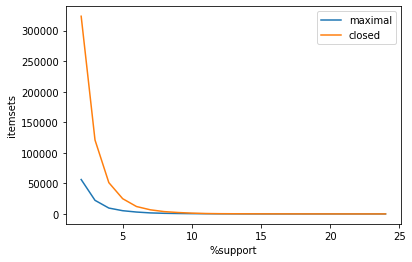

In [ ]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

#Support vs number of itemsets for ... \ ...

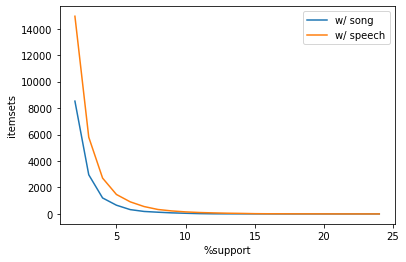

In [ ]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "song" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "speech" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ song")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ speech")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Rules

In [ ]:
conf = 80
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
61,"(-1.0, -0.202]_min","((0.224, 0.999]_max, (0.0262, 0.152]_std, (-69...",491,20.024470,0.980040,3.920160
19,"(-0.0544, -0.00613]_min","((0.0036699999999999997, 0.0555]_max, (151.385...",491,20.024470,0.978088,3.918743
69,"(-1.0, -0.202]_min","((0.224, 0.999]_max, (83.61999999999999, 122.6...",483,19.698206,0.977733,3.910931
56,"(-1.0, -0.202]_min","((0.224, 0.999]_max, (0.0262, 0.152]_std, (83....",483,19.698206,0.973790,3.895161
15,"(-0.0544, -0.00613]_min","((0.0036699999999999997, 0.0555]_max, (-1085.4...",505,20.595432,0.971154,3.890963
...,...,...,...,...,...,...
153,speech,"((0.0036699999999999997, 0.0555]_max, (-0.0003...",427,17.414356,0.838900,1.434437
39,speech,"((-0.0544, -0.00613]_min, (151.385, 195.943]_m...",439,17.903752,0.834601,1.427086
34,speech,"((-0.0544, -0.00613]_min, (-1085.481, -826.464...",423,17.251223,0.832677,1.423797
16,speech,"((-0.0544, -0.00613]_min, (0.00366999999999999...",404,16.476346,0.822811,1.406926


In [ ]:
rules_df[rules_df["consequent"] == "min"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [ ]:
print("to_predict:", [r for r in rules if r[0] == "speech"][0][0])
print("how?", [r for r in rules if r[0] == "speech"][0][1])

to_predict: speech
how? ('(-0.0544, -0.00613]_min', '(0.0036699999999999997, 0.0555]_max', '(-0.000348, 0.00679]_std')


In [ ]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

In [ ]:
.sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()